In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-80.csv')
# Churn becomes true when user stops using the service.

In [3]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data manipulation

In [4]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
# Categorical values must be assigned numerical labels using label encoder, one-hot encoding
# Lable Encoder is used for mapping categorical values to 0, 1, 2, 3, 4...

from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

le_encoder.fit(churn_df['International plan'])

LabelEncoder()

In [6]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])

In [7]:
 churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Correlation Plan

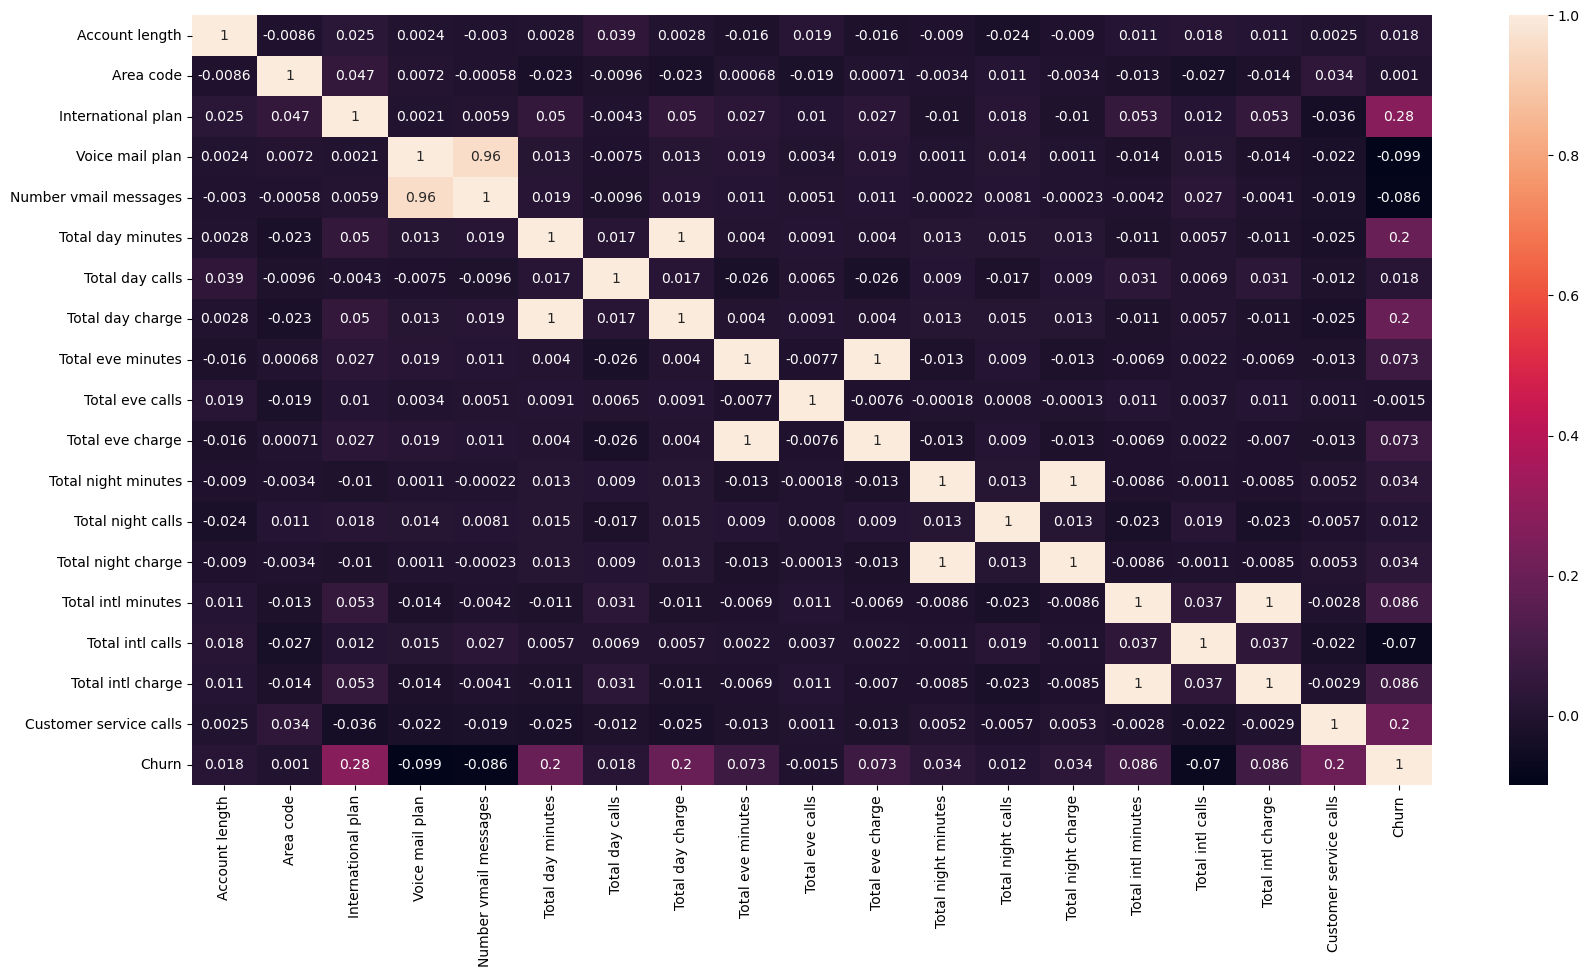

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(churn_df.corr(), annot = True)
plt.show()

In [9]:
# Issues observed from data interpretation

# Issue-1: Imbalanced class

# Issue-2: (Some features are highly dependent, keep anyone of them)
# Voice mail plan and Number vmail messages are 0.96.
# Total day minutes and Total day charge are 1

#### Issue-1: Imbalanced dataset

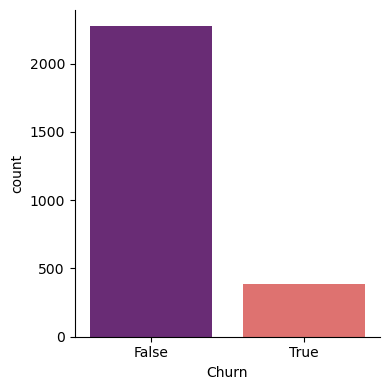

In [10]:
# Imbalanced class data
sns.catplot(x = 'Churn', kind = 'count', data = churn_df, palette = 'magma', height = 4)

In [11]:
churn_df["Churn"].value_counts()
# Values show that the data is imbalanced for target variable

False    2278
True      388
Name: Churn, dtype: int64

#### Handling the imbalanced data: Data Augmentation

In [12]:
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [13]:
# Apple Resample
df_1_upsample = resample(df_1, n_samples = 1139, replace = True, random_state = 123)
# n_samples means the final number of samples in a column, it is not like extra samples need to be added.

In [14]:
# Merge
churn_df1 = pd.concat([df_0, df_1_upsample])

In [15]:
churn_df1['Churn'].value_counts()

False    2278
True     1139
Name: Churn, dtype: int64

In [16]:
len(churn_df1['Churn'])

3417

In [17]:
churn_df1['Churn'].value_counts() / len(churn_df1['Churn'])

False    0.666667
True     0.333333
Name: Churn, dtype: float64

#### Split into Feature and Target

In [18]:
churn_df1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#### Issue-2: Features dependency

In [19]:
X = churn_df1.drop(['State','Number vmail messages', 'Total day charge', 'Total eve charge',
                    'Total night charge', 'Total intl charge', 'Churn'], axis=1)
# Dropping one of two which are highly relative

Y = churn_df1['Churn']

#### Train Test split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'entropy', class_weight = {0:66.67, 1:33.33}, max_depth = 11)

In [22]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 66.67, 1: 33.33}, criterion='entropy',
                       max_depth=11)

In [23]:
clf_tree.score(x_test, y_test)

0.9488304093567251

In [24]:
clf_tree.score(x_train, y_train)

0.9663373582144164

In [25]:
clf_tree.get_depth()

11

#### Plot Decision Tree

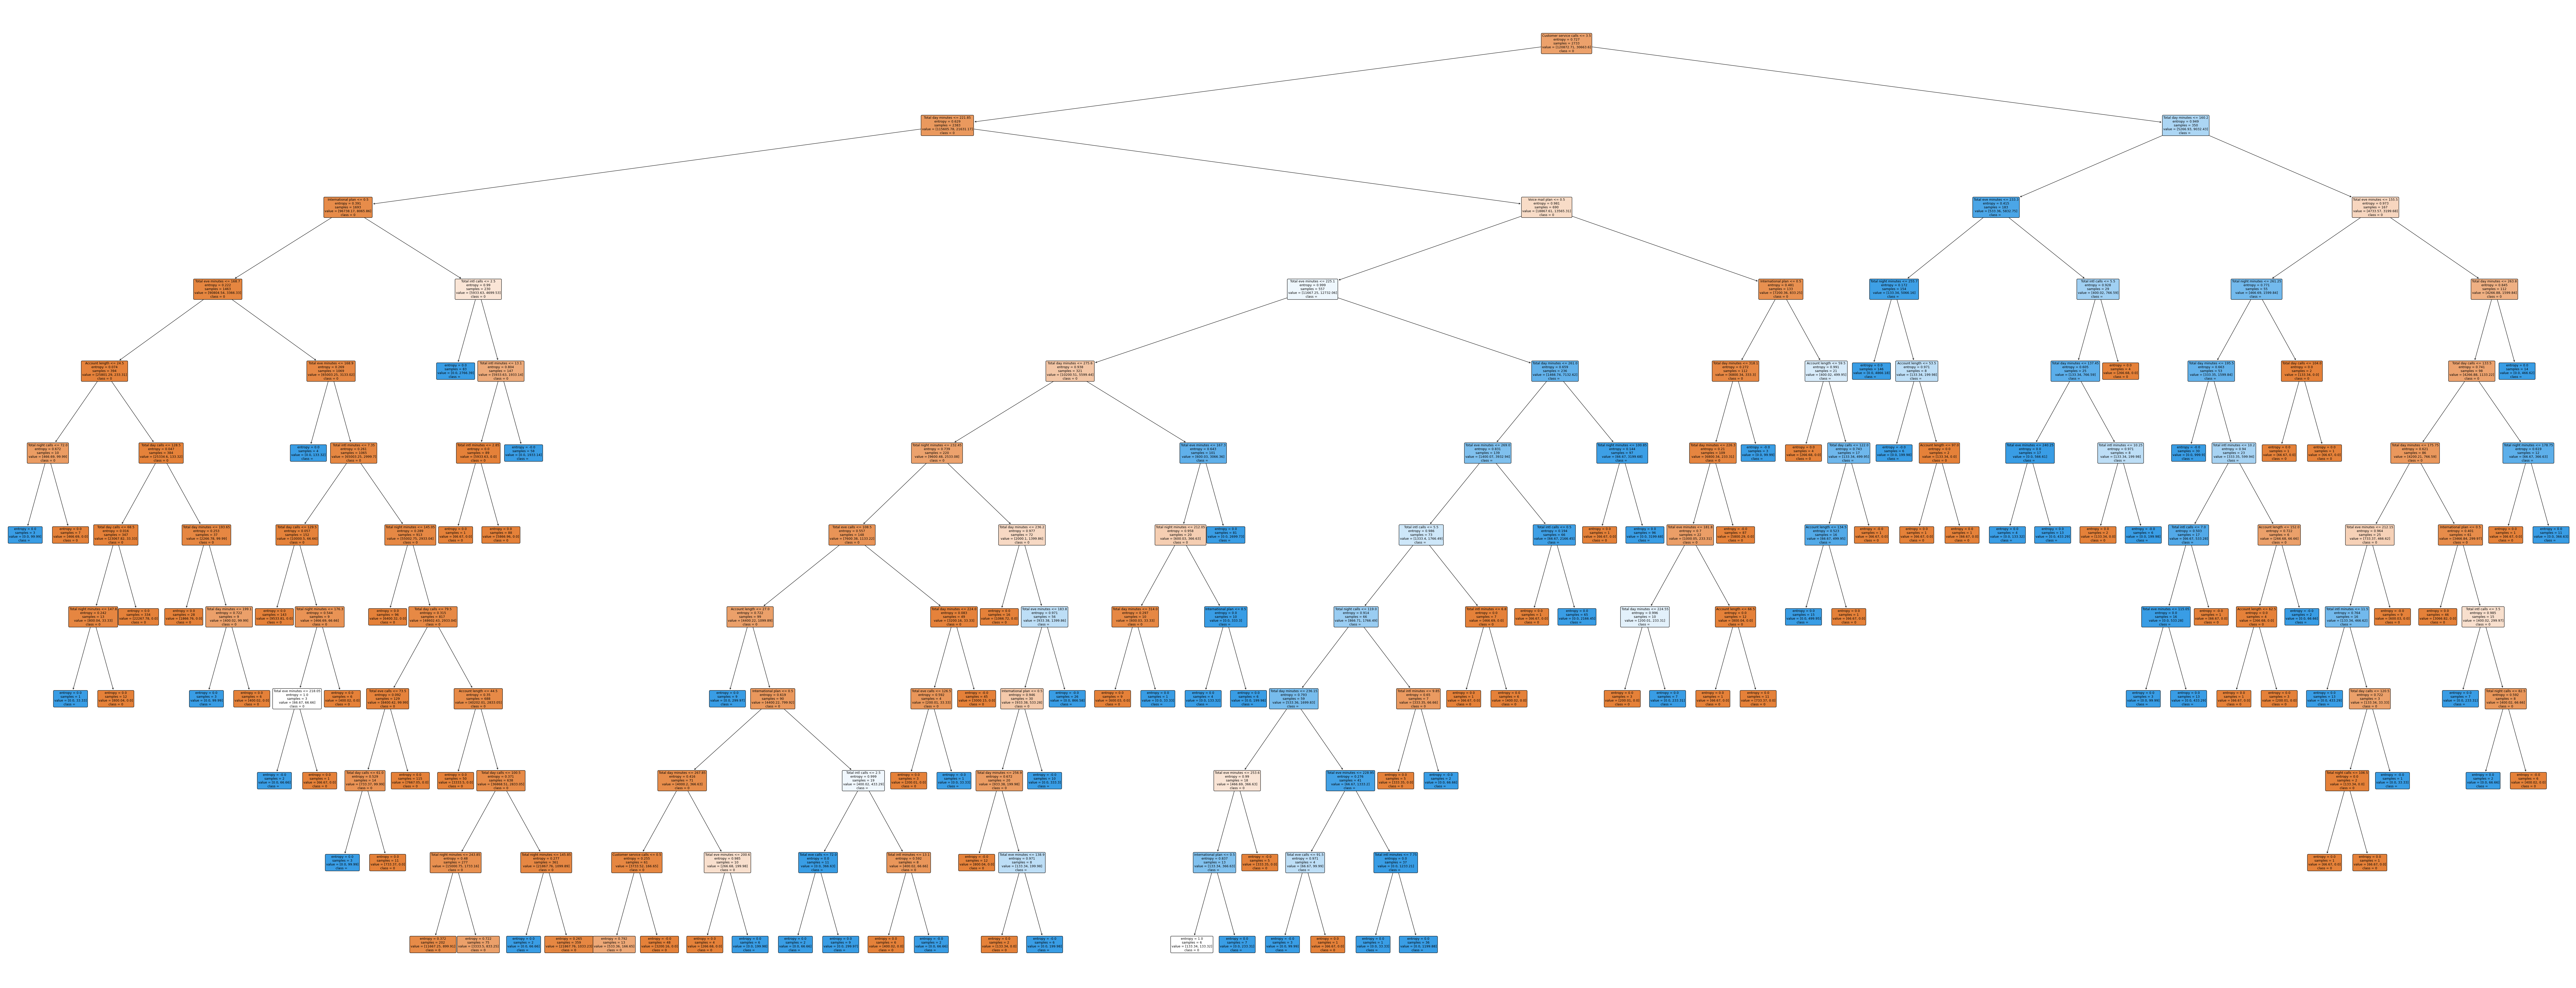

In [26]:
from sklearn import tree
fig = plt.figure(figsize = (130,50))
_ = tree.plot_tree(clf_tree, feature_names = X.columns, class_names = str(churn_df1.Churn),
               filled = True, rounded = True, fontsize = 9)
# Class name is lable which has to be introduced as string datatype.
# _ is just a variable we introduced, to hide all the background calculations.

In [27]:
# Interpretation:

# All starts with customer service calls <= 3.5
# Left hand side it is True bydefault.
# You will see a lot of leaf nodes here, where entropy becomes zero.

#### Classification Tree

In [28]:
predictions = clf_tree.predict(x_test)

#### Classification Matrix

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[450,  15],
       [ 20, 199]], dtype=int64)

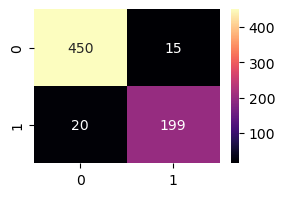

In [30]:
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap= 'magma', fmt = '0.0f')
plt.show()

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       465
        True       0.93      0.91      0.92       219

    accuracy                           0.95       684
   macro avg       0.94      0.94      0.94       684
weighted avg       0.95      0.95      0.95       684



#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf_rf = RandomForestClassifier(bootstrap = True, n_estimators = 100, criterion = 'entropy', max_depth = 10)
# n_estimators means number of trees.

In [34]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [35]:
clf_rf.score(x_test, y_test)

0.9546783625730995

In [36]:
clf_rf.score(x_train, y_train)

0.969264544456641

In [37]:
predictions = clf_rf.predict(x_test)

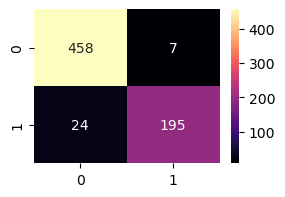

In [38]:
plt.figure(figsize = (3,2))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, cmap = 'magma', fmt = '0.0f')
plt.show()

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97       465
        True       0.97      0.89      0.93       219

    accuracy                           0.95       684
   macro avg       0.96      0.94      0.95       684
weighted avg       0.96      0.95      0.95       684

